In [ ]:
# code from laptop
from cmath import nan
from traceback import format_exception_only
#from eagerpy import zeros_like
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.tree import plot_tree
import mtools as mot
from scipy.stats import ranksums
from os.path import exists
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
import matplotlib.cm as cm
import random
import pickle
import scipy.io as spio
import pandas as pd
import matplotlib.animation as animation
from scipy.signal import find_peaks
import scipy.stats as stats
import configparser
from rastermap import Rastermap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import scipy.signal
from pathlib import Path
import configparser
import os  # Import os for cross-platform compatibility



In [ ]:


# # Read the configuration file
# config.read('config.ini')

# # Get the data folder path from the config file
# savefolder= config['paths']['savefolder']
# datafolder= config['paths']['datafolder']
# skeletonsfolder= config['paths']['skeletonsfolder']

In [ ]:

# Detect base directory
try:
    BASE_DIR = Path(__file__).resolve().parent  # For scripts
except NameError:
    BASE_DIR = Path.cwd()  # For Jupyter Notebooks

# Move one level up
BASE_DIR = BASE_DIR.parent

# Load config.ini
config = configparser.ConfigParser()
config.read(os.path.join(os.getcwd(), "config.ini"))

# Construct full paths using pathlib and ensure they end with a separator
skeletonsfolder = str((BASE_DIR / config["paths"]["skeletonsfolder"]).resolve()) + os.sep
savefolder = str((BASE_DIR / config["paths"]["savefolder"]).resolve()) + os.sep
datafolder = str((BASE_DIR / config["paths"]["datafolder"]).resolve()) + os.sep

# Print paths to verify
print("Base Directory:", BASE_DIR)
print("Skeletons Folder:", skeletonsfolder)
print("Save Folder:", savefolder)
print("Data Folder:", datafolder)


Base Directory: c:\Users\hamed\Desktop\Hamed\Github\TP7
Skeletons Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\data\GCaMP6f_478-485\skeleton\
Save Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\results_new\
Data Folder: C:\Users\hamed\Desktop\Hamed\Github\TP7\data\GCaMP6f_478-485\


In [22]:
fol1='485'#fol#'478'
phases=['learning','learned']
direction=['L','R']
PC_phase_data={}
PCclstr_phase_data={}

#sessinfo_and_mask=np.load(savefolder+fol1+'Sesseion_info_All',allow_pickle=True)
# Construct the correct file path
file_path = os.path.join(savefolder, fol1 + "Sesseion_info_All")

# Load the file
sessinfo_and_mask = np.load(file_path, allow_pickle=True)
sess_info=sessinfo_and_mask['sess_info']
seqs=sess_info['seqs']
Masks=sessinfo_and_mask['Masks']

## initializtion


In [ ]:
plt.rcParams['svg.fonttype'] = 'none'  # Export text as SVG <text> objects, not paths

mpl.rcParams['xtick.major.size'] = 6    # Length of major ticks on x-axis
mpl.rcParams['xtick.major.width'] = 1.5 # Width of major ticks on x-axis
mpl.rcParams['xtick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['xtick.major.pad'] = 10    # Padding between ticks and x-axis labels

mpl.rcParams['ytick.major.size'] = 6    # Length of major ticks on y-axis
mpl.rcParams['ytick.major.width'] = 1.5 # Width of major ticks on y-axis
mpl.rcParams['ytick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['ytick.major.pad'] = 10    # Padding between ticks and y-axis labels


# Set default spine and tick settings globally for all plots
mpl.rcParams['axes.linewidth'] = 1.5     # Set the width of all spines (top, bottom, left, right)
mpl.rcParams['xtick.major.width'] = 1.5  # Width of major ticks on x-axis
mpl.rcParams['ytick.major.width'] = 1.5  # Width of major ticks on y-axis
mpl.rcParams['xtick.labelsize'] = 12     # Font size of x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 12     # Font size of y-axis tick labels

# Define the helper function to hide spines
def hide_spines(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [ ]:
model = Rastermap(n_components=1, n_X=60).fit(sess_info['extract'])# compute raster map of transient data

isort = np.argsort(model.embedding[:,0])

Sfilt=sess_info['extract'][isort, :]
Sfilt = stats.zscore(Sfilt, axis=1)
sorted_seqs=[]
for seq in seqs:
    sorted_seqs.append(np.ravel([np.where(isort==x)[0] for x in seq]))# sorting seqs according to rastermap

nmin 109
0.039443254470825195
2.1260464191436768
2.287904977798462
2.287904977798462
(58, 60)
(90,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0277      2
0.01s    10        0.1155      4
0.02s    20        0.1954      8
0.04s    30        0.3259      18
0.06s    40        0.4233      28
0.06s    50        0.5027      38
0.08s    60        0.5764      48
0.09s    70        0.6451      58
0.10s    80        0.6457      58
0.12s   final      0.6457
0.12s upsampled    0.6457


In [25]:
colorlist=["#FFD700",
"#00FFFF",
"#7346d0",
"#72d658",
"#d65171",
"#c09294",
"#6678c6",
"#cdd24b",
"#FFA500",#
"#4a7875",
"#ae3e83",
"#7b332e",
"#c98ccc",
"#d74f34",
"#45314e",
"#cf4dcc",
"#5f893e",
"#cac795",
"#c48840",
"#4f2a7e"]

#colorlist[np.max(sess_info['ids_clust'])]='#E5E5E5'# make bad cluster gray
colorlist[-1]='#E5E5E5'# make bad cluster gray

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors

def get_cluster_colors(n):
    """
    Generate n distinct hex color codes using Seaborn's husl palette.
    
    Parameters
    ----------
    n : int
        Number of distinct colors (clusters) to generate.
        
    Returns
    -------
    List[str]
        A list of n hex color codes.
    """
    palette = sns.color_palette("husl", n)
    # Use matplotlib.colors.to_hex to convert RGB tuple to hex string
    return [mcolors.to_hex(color) for color in palette]

# Example usage:
n_clusters = 27  # 27 clusters
colorlist = get_cluster_colors(n_clusters)
print(colorlist)


['#f77189', '#f77463', '#ed7e32', '#d58c32', '#c39532', '#b49b32', '#a4a031', '#92a531', '#7aaa31', '#50b131', '#32b261', '#34b07f', '#34ae91', '#35ad9e', '#36acaa', '#37abb5', '#38a9c2', '#39a7d3', '#3ba3ec', '#749af4', '#9c8ff4', '#bb83f4', '#d872f4', '#f45cf0', '#f564d4', '#f669bc', '#f66da5']


[]

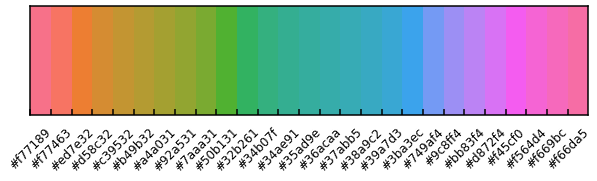

In [29]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))

# Plot rectangles with the corresponding colors
for i, color in enumerate(colorlist):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set the axis limits and labels
ax.set_xlim(0, len(colorlist))
ax.set_ylim(0, 1)
ax.set_xticks(range(len(colorlist)))
ax.set_xticklabels(colorlist, rotation=45)
ax.set_yticks([])

In [31]:
# def seq_raster_plot2(sess_info,cond_len,sorted_seqs,cond_names,binary_mask):
#     #figs=plt.figure(figsize=(10,5))
#     fig, ax = plt.subplots(figsize=(20,4))

#     for ix,seq in enumerate(sorted_seqs):
#         a=np.arange(len(seq))/len(sess_info['seqs'])+sess_info['id_peaks'][ix]
#         ax.scatter(a,seq,marker='|',color = colorlist[sess_info['ids_clust'][ix]],s=2,rasterized=True)
#     #plt.vlines(cond_len.values(),0,sess_info['extract'].shape[0],alpha=1,color='k')
    
#     #plt.plot((poprate/np.max(poprate)*sp.shape[0]),alpha=.2)
#     #plt.vlines(id_peaks,0,sp.shape[0],alpha=.5)
#     #plt.xlim([100,16000])
#     #plt.legend()
#     all_x_values = []
#     labels = []
#     for label, x_values in cond_len.items():
#         all_x_values.extend(x_values)
#         labels.extend([label] * len(x_values))

#     ax.set_xticks(all_x_values)
#     ax.set_xticklabels(labels, rotation=0, fontsize=40)


#     #binary_mask=np.asarray(Masks['conditions'])# if you wnat multiple color for differnt arenas (inwar/outward) uncoment this

#     # for ix in np.unique(binary_mask):
#     #     label=list(cond_names.keys())[np.where(np.asarray(list(cond_names.values()))==ix)[0][0]]
#     #     ax.fill_between(np.arange(len(binary_mask)), -1, sess_info['extract'].shape[0], where=binary_mask == ix, alpha=0.1,label=label)



#         #ax.axhline(x=np.where(binary_mask == ix)[0], color='black', linestyle='--', linewidth=2)
#     plt.vlines(x=np.where(abs(np.diff(binary_mask))>0), ymin=-1,ymax=sess_info['extract'].shape[0],color='black', linestyle='-', linewidth=1)
    
#     # Get the legend
#     legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

#     # if len(cond_names)>4:
#     # # Hide the second-to-last legend item (line and text label)
#     #     handles = legend.legendHandles
#     #     labels = legend.texts
#     #     handles[-2].set_visible(False)  # Hide the second-to-last legend item line
#     #     labels[-2].set_visible(False)  # Hide the second-to-last legend item text label
#     #     handles[-1].set_visible(False)  # Hide the second-to-last legend item line
#     #     labels[-1].set_visible(False)  # Hide the second-to-last legend item text label

#     #plt.legend()
#         # Create legend elements for each unique cluster.
#     unique_clusters = np.unique(sess_info['ids_clust'])
#     legend_elements = []
#     for cl in unique_clusters:
#         # Treat -1 as a "Bad Cluster" (optional)
#         if cl == -1:
#             legend_elements.append(Patch(facecolor='gray', label="Bad Cluster"))
#         else:
#             legend_elements.append(Patch(facecolor=colorlist[int(cl)], label=f"Cluster {int(cl)}"))

#     # Add the legend to the plot, positioned to the right of the axes.
#     ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

In [50]:
def seq_raster_plot(sess_info, cond_len, sorted_seqs, cond_names, binary_mask,colorlist):


    # Create the figure and axis for plotting
    fig, ax = plt.subplots(figsize=(20, 4))

    # Plot each sequence as a scatter plot
    for ix, seq in enumerate(sorted_seqs):
        # Create an x-axis array for this sequence, offset by the session's id_peak value
        a = np.arange(len(seq)) / len(sess_info['seqs']) + sess_info['id_peaks'][ix]
        # Plot with a vertical marker ('|') and marker size s=2
        ax.scatter(a, seq, marker='|', color=colorlist[sess_info['ids_clust'][ix]], s=2,rasterized=True)

    # Draw vertical lines for each condition boundary (if cond_len.values() returns arrays)
    plt.vlines(list(cond_len.values()), -2, sess_info['extract'].shape[0], alpha=1, color='k')

    # Compute midpoints for each condition by pairing _L and _R values.
    # We assume that cond_len is a dictionary with keys like 'sampling_L', 'sampling_R', etc.
    all_x_values = []
    all_labels = []
    # Define the base conditions (each with a left and right key)
    conditions = ['sampling', 'outward', 'reward', 'inward']
    for cond in conditions:
        left_key = cond + '_L'
        right_key = cond + '_R'
        if left_key in cond_len and right_key in cond_len:
            left_arr = np.array(cond_len[left_key])
            right_arr = np.array(cond_len[right_key])
            # Compute the midpoint for each session (assumes arrays are the same length)
            midpoints = (left_arr + right_arr) / 2
            all_x_values.extend(midpoints)
            all_labels.extend([cond] * len(midpoints))
        else:
            # Handle missing keys if necessary
            pass

    # Set the xticks using the computed midpoints, with the corresponding condition labels.
    ax.set_xticks(all_x_values)
    ax.set_xticklabels(all_labels, rotation=45, fontsize=18)

    # Draw vertical lines where the binary_mask changes
    change_indices = np.where(np.abs(np.diff(binary_mask)) > 0)[0]
    plt.vlines(x=change_indices, ymin=-1, ymax=sess_info['extract'].shape[0],
               color='black', linestyle='-', linewidth=1)

    # Create legend elements for each unique cluster.
    unique_clusters = np.unique(sess_info['ids_clust'])
    legend_elements = []
    for cl in unique_clusters:
        # Treat -1 as a "Bad Cluster" (optional)
        if cl == -1:
            legend_elements.append(Patch(facecolor='gray', label="Bad Cluster"))
        else:
            legend_elements.append(Patch(facecolor=colorlist[int(cl)], label=f"Cluster {int(cl)}"))



    # Draw vertical lines where the binary mask changes

    # Compute total time in seconds using sampling frequency (fs)
    fs = 20  # sampling frequency in Hz
    x_label_time =change_indices[-1]-change_indices[-2]#length of learned (sess_info['id_peaks'][-1] - sess_info['id_peaks'][0]) / fs
    ax.set_xlim(0, x_label_time)  # Set x-axis limits

    # --- Add scale bar ---
    scale_length = 200*fs  # scale bar represents 500 sec
    margin = 100        # margin from the right edge (in seconds)
    x_end = x_label_time - margin  # right end of the scale bar
    x_start = x_end - scale_length # left end of the scale bar

    # Get current y-axis limits to position the scale bar below the plot
    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    y_position = -5#y_min - 0.1 * y_range  # place scale bar 10% below the current y_min

    # Draw the horizontal scale bar and label it
    ax.hlines(y=y_position, xmin=x_start, xmax=x_end, colors='black', linewidth=20)
    ax.text((x_start + x_end) / 2, y_position - 0.05 * y_range, "200 sec",
            ha='center', va='top', fontsize=10)
    


In [ ]:


def seq_raster_plot2(sess_info, cond_len, sorted_seqs, cond_names, binary_mask):
    fig, ax = plt.subplots(figsize=(20, 4))

    # Plot each sequence
    for ix, seq in enumerate(sorted_seqs):
        # Compute x positions for each sequence
        a = np.arange(len(seq)) / len(sess_info['seqs']) + sess_info['id_peaks'][ix]
        ax.scatter(a, seq, marker='|', color=colorlist[sess_info['ids_clust'][ix]],
                   s=2, rasterized=True)
    
    # Set x-axis tick labels based on cond_len dictionary
    all_x_values = []
    labels = []
    for label, x_values in cond_len.items():
        all_x_values.extend(x_values)
        labels.extend([label] * len(x_values))
    ax.set_xticks(all_x_values)
    #ax.set_xticklabels(labels, rotation=0, fontsize=20)
    
    # Draw vertical lines where the binary mask changes
    change_indices = np.where(np.abs(np.diff(binary_mask)) > 0)[0]
    ax.vlines(x=change_indices, ymin=-1, ymax=sess_info['extract'].shape[0],
              color='black', linestyle='-', linewidth=1)
    
    # Create legend elements for each unique cluster
    unique_clusters = np.unique(sess_info['ids_clust'])
    legend_elements = []
    for cl in unique_clusters:
        if cl == -1:
            legend_elements.append(Patch(facecolor='gray', label="Bad Cluster"))
        else:
            legend_elements.append(Patch(facecolor=colorlist[int(cl)], label=f"Cluster {int(cl)}"))
    
    # Add the legend to the plot, positioned to the right of the axes.
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    # Compute total time in seconds using sampling frequency (fs)
    fs = 20  # sampling frequency in Hz
    x_label_time = (sess_info['id_peaks'][-1] - sess_info['id_peaks'][0]) / fs
    ax.set_xlim(0, x_label_time)  # Set x-axis limits

    # --- Add scale bar ---
    scale_length = 500*fs  # scale bar represents 500 sec
    margin = 100        # margin from the right edge (in seconds)
    x_end = x_label_time - margin  # right end of the scale bar
    x_start = x_end - scale_length # left end of the scale bar

    # Get current y-axis limits to position the scale bar below the plot
    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    y_position = -5#y_min - 0.1 * y_range  # place scale bar 10% below the current y_min

    # Draw the horizontal scale bar and label it
    ax.hlines(y=y_position, xmin=x_start, xmax=x_end, colors='black', linewidth=40)
    ax.text((x_start + x_end) / 2, y_position - 0.05 * y_range, "500 sec",
            ha='center', va='top', fontsize=22)
    


## Raster map plot

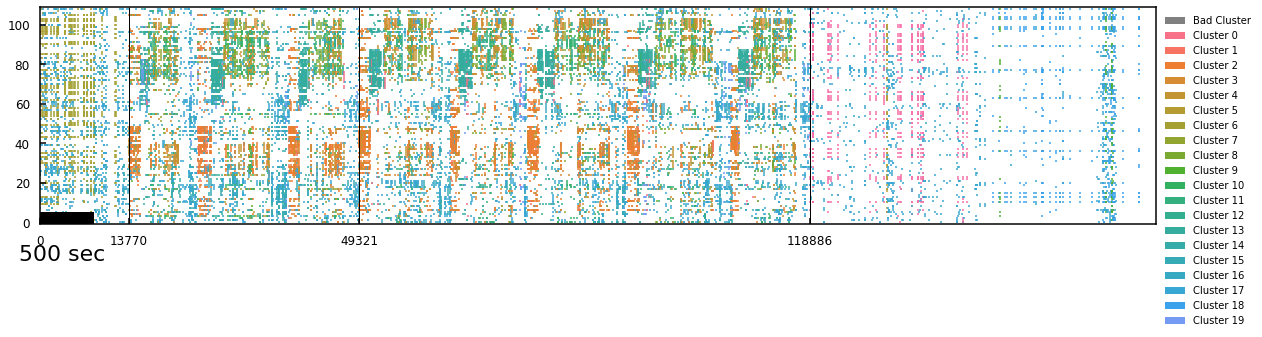

In [35]:
task_names={'arena':2,'learning':0,'leanred':1,'sleep':3}
task_len={}
l0=0
for tsk,valcond in task_names.items():
 
    #cond_len[con]=np.where(np.diff(np.where(np.asarray(Masks['conditions'])==valcond))>1)[1]
    #binvec=np.asarray(Masks['conditions'])
    binvec=np.asarray(Masks['phases'])

    task_len[tsk]= np.where((binvec == valcond) & (np.roll(binvec, 1) != valcond))[0]
    #cond_len=task_len
binary_mask=np.asarray(Masks['phases'])

seq_raster_plot2(sess_info,task_len,sorted_seqs,task_names,binary_mask)
plt.xlim([0,sess_info['extract'].shape[1]])
plt.ylim([-1,sess_info['extract'].shape[0]])

plt.savefig(savefolder+'Ratermap_test'+fol1+'.svg',dpi=400)

## Plot only learned raster map

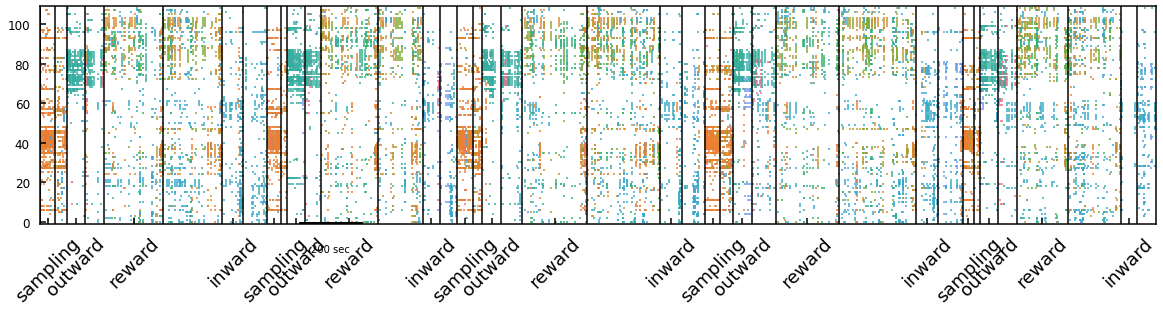

In [51]:
conds=['sampling_L',
 'sampling_R',
 'outward_L',
 'outward_R',
 'reward_L',
 'reward_R',
 'inward_L',
 'inward_R']


cond_number = dict(zip(conds, np.arange(len(conds))))# make mask values for each task
cond_names=cond_number
cond_len={}
l0=0
for con,valcond in cond_names.items():
 
    #cond_len[con]=np.where(np.diff(np.where(np.asarray(Masks['conditions'])==valcond))>1)[1]
    binvec=np.asarray(Masks['conditions'])

    cond_len[con]= np.where((binvec == valcond) & (np.roll(binvec, 1) != valcond))[0]

    
seq_raster_plot(sess_info,cond_len,sorted_seqs,cond_names,binary_mask,colorlist)
plt.xlim(task_len['leanred'][0],task_len['sleep'][0])
plt.ylim([-1,sess_info['extract'].shape[0]])

plt.savefig(savefolder+'Ratermap_learned'+fol1+'.svg',dpi=1000)